# <span style="color:green"><ins>Chapitre 1 : devoir</ins></span>

On a mesuré la différence de potentiel en fonction du courant dans une cellule photovoltaïque. Les 14 points de mesure se trouvent ci-dessous. On aimerait connaître la valeur du courant pour laquelle la puissance est maximale et la valeur de cette puissance maximale. Comme nous n'avons que 14 mesures, il est judicieux d'interpoler les données afin d'estimer au mieux ces valeurs. 

|I(mA)|0.00|0.07|0.73|1.43|3.41|6.01|7.32|7.59|7.68|7.77|7.81|7.88|7.91|7.92|
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|V(mV)|745|744|736|729|696|615|460|331|258|187|151|98.6|67.6|46.4|

<ol>
<li>Recopiez ces données dans Python et faites le graphe de la puissance en fonction du courant pour ces 14 points de données afin d'avoir une idée grossière de la courbe continue sous-jacente (rappel : $P=VI$).</li>
<li>Testez les méthodes d'interpolation suivantes: linéaire et spline.</li>
<li>Sur chacune de vos courbes interpolées, localisez le maximum via fmin (de scipy.optimize) et reportez ce point sur votre graphe de la puissance en fonction du courant (le point doit être bien visible).</li>
</ol>

In [1]:
import numpy as np
import scipy.interpolate as scint
import scipy.optimize as scop
import matplotlib.pyplot as plt

### Données

In [2]:
# Courants
I=np.array([0.00,0.07,0.73,1.43,3.41,6.01,7.32,7.59,7.68,7.77,7.81,7.88,7.91,7.92])
print(I)
# Tensions
U=np.array([745,744,736,729,696,615,460,331,258,187,151,98.6,67.6,46.4])
print(U)

[0.   0.07 0.73 1.43 3.41 6.01 7.32 7.59 7.68 7.77 7.81 7.88 7.91 7.92]
[745.  744.  736.  729.  696.  615.  460.  331.  258.  187.  151.   98.6
  67.6  46.4]


In [3]:
# Puissance expérimentale
P=U*I

### Graphe des points expérimentaux

Text(0, 0.5, 'Puissance ($\\mu$W)')

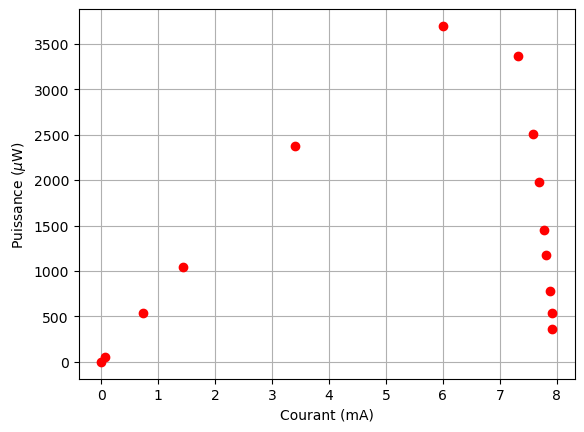

In [4]:
plt.plot(I,P,"ro")
plt.grid()
plt.xlabel("Courant (mA)")
plt.ylabel("Puissance ($\mu$W)")

### Fonctions d'interpolations

In [5]:
y_linear=scint.interp1d(I,P,"linear")
y_cubic=scint.interp1d(I,P,"cubic")

### Recherche max sur chaque courbe d'interpolation

In [6]:
# Inversion fonction pour recherche min à la place de recherche max
y_linear_m=lambda x: -y_linear(x)
y_cubic_m=lambda x: -y_cubic(x)
xmax_linear=scop.fmin(y_linear_m,6)
xmax_cubic=scop.fmin(y_cubic_m,6)

Optimization terminated successfully.
         Current function value: -3696.149922
         Iterations: 20
         Function evaluations: 40
Optimization terminated successfully.
         Current function value: -3909.738668
         Iterations: 14
         Function evaluations: 28


### Graphe final

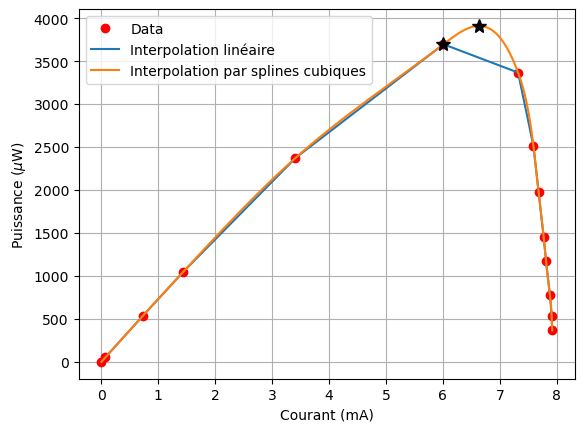

In [7]:
plt.plot(I,P,"ro",label="Data")
I_interp=np.linspace(I[0],I[-1],1000)     # abscisses pour tracer les courbes sur l'intervalle des courants
plt.plot(I_interp,y_linear(I_interp),label="Interpolation linéaire")
plt.plot(I_interp,y_cubic(I_interp),label="Interpolation par splines cubiques")
plt.plot(xmax_linear,y_linear(xmax_linear),"k*",markersize=10)
plt.plot(xmax_cubic,y_cubic(xmax_cubic),"k*",markersize=10)
plt.grid()
plt.xlabel("Courant (mA)")
plt.ylabel("Puissance ($\mu$W)")
plt.legend()